# Introduction

- statical bias
- feature importance

## Statistical Bias

- topics for this week (highlited blue)
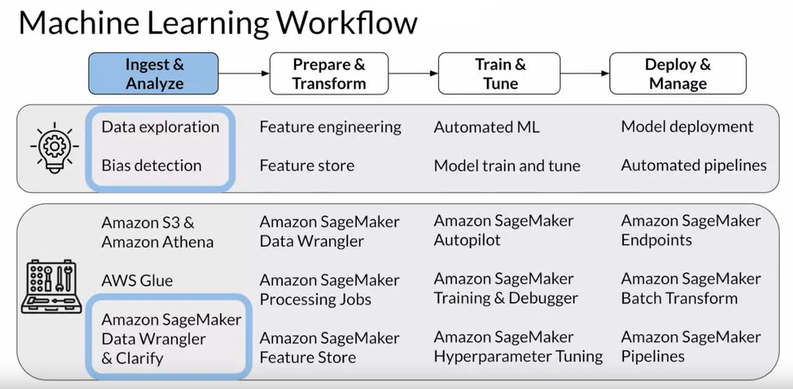

- SageMaker Wrangler and SageMaker Clarify to find the bias detection

## What is statistical bias?

- The training data doesnot comprehnsively represent the problem space
- this is the property of over estimate or under estimate a parameter
- when some of the parameters are more heavely weighted or represented than others
    - fraud detection; the fraudulet transactions are very less

# What causes Statistical Bias?

- Activity Bias
    - very small population is active
    - consider social media, very small portion of the population is active in social media
    
- Societal Bias
    - Human generated content
    
- Selection Bias
    - feedback loop
    - a hit movie -> people watch more -> recommend to more people
    - this forms a loop
    
- Data Drift
    - this is happen, when the distribution of testing data is diff from the data used to train the model
    - various drifts are,
    - covarient drift:- the distirbution of indipendent variable may change
    - prior probability drift:- distirbution of the target variable may change
    - concept drift:- relationship b/w features and labels will change


# Measuring Statistical Bias

- metrics
- measured for one facets/feature of data

- class imbalance(CI)
    - number of values provided for diff facets of data
    - does one category is more than others?
    
- difference in propotion of labels (DL)
    - measure the imbalance of positive outcomes b/w diff facet values.
    - product review: does product category a has a higher ratign than others?

# Detecting Statistical Bias

- Tools
    - SageMaker DataWrangler
    - SageMaker Clarify
    
- DataWrangler
    - source
    - visualize
    - transform
    - statistical bias report
    - feature importance
    
    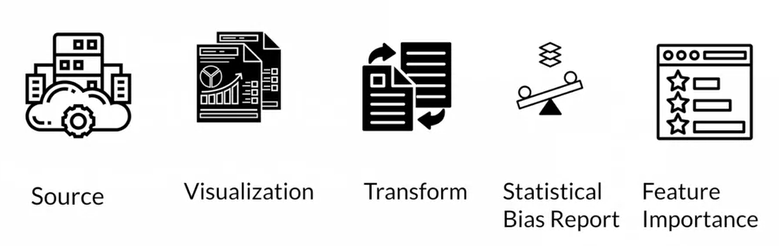

- Clarify
    - tool for statistical bias detection
    - it provides
        - bias report
        - model bias report
        - model explainablility
            - trained and hosted models
        - data drift
        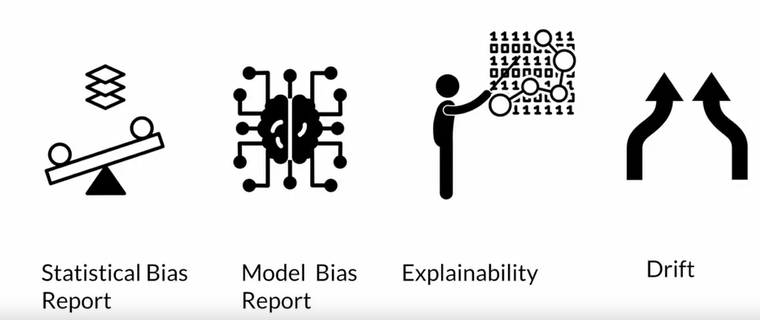
        
- code
    - import clarify from sagemaker
    - need to specify the s3 location where you need the report

In [ ]:
from sagemaker import clarify

clarify_processor = clarify.SageMakerClarifyProcessor(
    role = role,
    instance_count = 1,
    instance_type = 'ml.c5.2xlarge',
    sagemaker_session=sess
)

bias_report_output_path = <<Define s3 path>>

In [ ]:
# now need to sepcify the data config object

bias_data_config = clarify.DataConfig(
    s3_data_input_path=..., # input location of data in s3
    s3_output_path=..., # output location of data in s3
    label='sentiment',
    heders=df_balanced.colums.to_list(),
    dataset_type='text/csv'
)
# label you are trying to predict (is that the output path?)

In [ ]:
bias_config = classify.BiasConfig(
    label_values_or_threshold=[...],
    facet_name='product_category'
)
# capture the feature that you are trying to calculate the bias


# pretraining method on the bias
clarify_processor.run_pre_training_bias(
    data_config=...,
    data_bias_config=...,
    methods=['CI', 'DPL', ...],
    wait=<<False/True>>,
    logs=<<False/True>>
)

# CI:- class imbalance
# wait:- should the bias calculation block the rest of the code, 
# or should it executed?
# logs:- shold capture the logs or not?

## Amazon SageMaker Processing

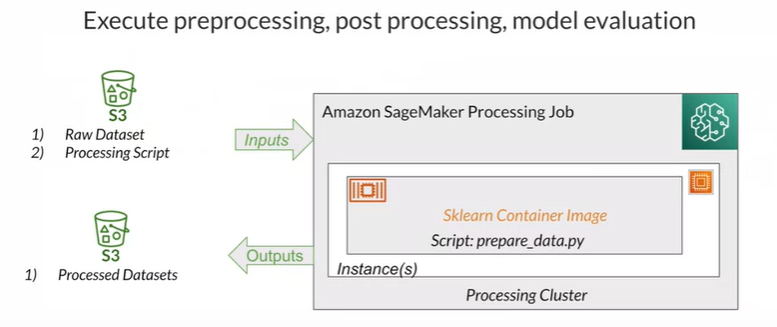

# Approaches to statistical bias detection

- 2 tools (Approach)
    - Clarify
    - Wrangler
    
- which tool to use at what situation
    - DataWrangler
        - UI based visual appearance
        - selections from dropdown boxes and option list
        - results are based subset of the data
        
    - Clarify
        - API based approach
        - scale the bias detection process
        - cluster
        - large dataset

# Feature Importance: SHAP

- open source framework SHAP (calculating)
- score for each features (importnace on final prediction)
- how useful this feature related to other features


- feature importance is based on a popular open source framework called SHapley Additive exPlanations (SHAP)
    - based on shapely values that is based on game theory
    - Game theory
        - in a game multiple players are involved
        - shaply values allow to attirbute the outcome of the game (win/loss) to the individual players in the game
        - this can be traslate into machine learning world
    - Local and Global explations
        - Local: - focus on indicate how a local varibale is contirbuting to the final output
        - Global: - the data in its entirity contribute to the machine learning output
        - SHAP will consider all possible combination of feature values and all possible outcome of the machine learning solution
        - so this is very time consuming
        - but consistenant and accurate

## How to run feature importnace

- amazon SageMaker Studio Home page
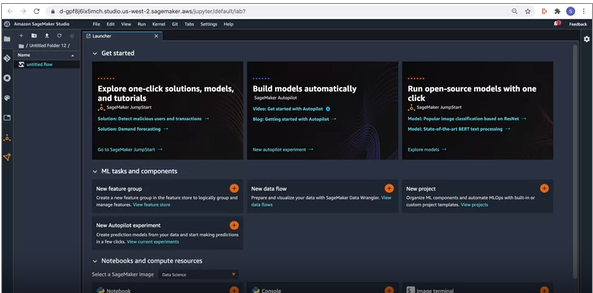

- select new data flow
    - can select data from multiple sources
    - s3/ athena
    - in this case s3
    
    - navigate to the right bucket
    - select the right data you need to find the feature impotance on
        - raw data of product csv (in this case)
        
    - when select the data, can see the preview of data
        - Ring and Recomended IND (label)
    
    - once the user is satisfied with the data, select the import dataset icon
    - once the data at dataWrangler env, click at the plus icon (fig below)
    
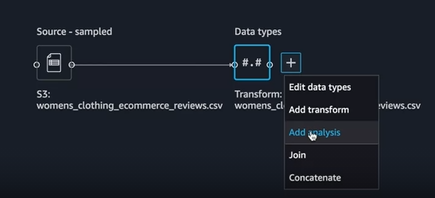
    

- add analysis, this will take you to another page
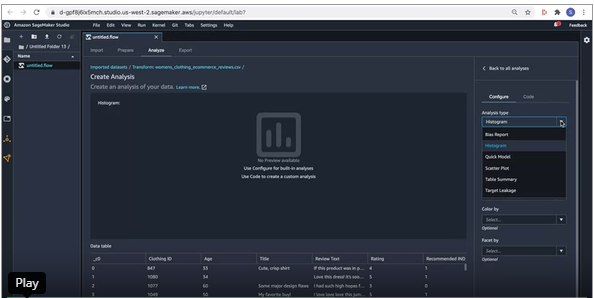

- Analysis type: - Quick Model
- Analysis Name:- name of your choise
- Label: - dependent variable (here star rating)
- hit preview to find the model importance
    - 70 to train and 30 to test
    
- random cut forest for feature importance
    - f1 score
    - feature importance
    
- now we can do feature engineering
- now you can create the entire analysis

# Additional Reading Materials

- If you wish to dive more deeply into the topics covered this week, feel free to check out these optional references. (You won’t have to read these to complete this week’s practice quizzes.)

    - [Measure Pretraining Bias - Amazon SageMaker](https://docs.aws.amazon.com/sagemaker/latest/dg/clarify-measure-data-bias.html)

    - [SHAP](https://shap.readthedocs.io/en/latest/)

